#                   Funciones de distribución
##                      Distribución Gaussiana o Normal
![Probabilidades según sigma](Probabilidad-y-sigma.png)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 0, 'Data')

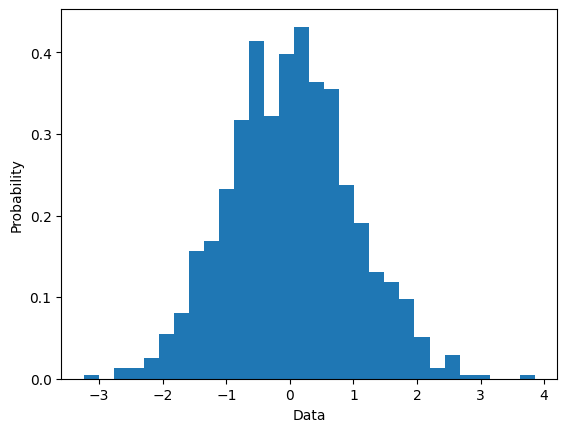

In [8]:
# Generamos 1000 números aleatorios

# Si fijamos la semilla el generador siempre dará los mismos números
np.random.seed(42)

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
x = np.random.normal(size=1000)

plt.hist(x, density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Data')

In [64]:
# Lanzamos dos dados
import random

dado1 = random.randint(1,6)
dado2 = random.randint(1,6)
resultado = dado1 + dado2
print(resultado)

6


In [65]:
# Creamos dataframe con 1000 tiradas dobles de dado
import pandas as pd

df = pd.DataFrame(np.random.randint(1, 7, size=(1000, 2)), columns=['dado1', 'dado2'])
df['resultado'] = df.dado1 + df.dado2
print(df)

     dado1  dado2  resultado
0        3      6          9
1        6      4         10
2        1      1          2
3        4      3          7
4        6      5         11
..     ...    ...        ...
995      4      3          7
996      2      3          5
997      5      5         10
998      4      4          8
999      3      5          8

[1000 rows x 3 columns]


Text(0.5, 0, 'Resultado de los dos dados')

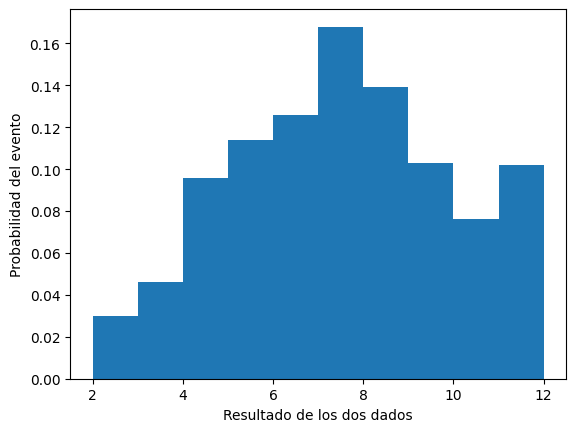

In [66]:
plt.hist(df.resultado, bins=10, density=True)
plt.ylabel('Probabilidad del evento')
plt.xlabel('Resultado de los dos dados')

Text(0.5, 0, 'Resultado de los 3 dados')

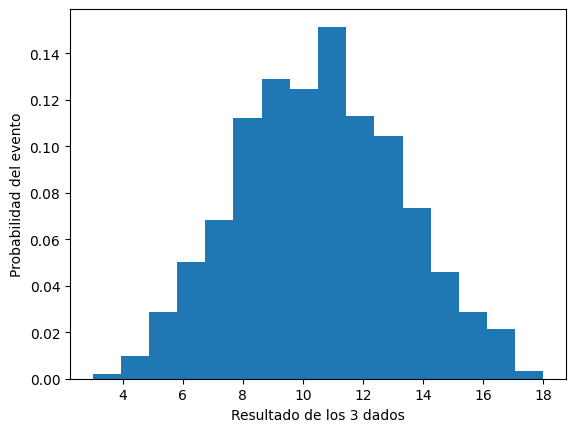

In [12]:
# Creamos dataframe con 1000 tiradas TRIPLES de dado
df = pd.DataFrame(np.random.randint(1, 7, size=(1000, 3)))
df['resultado'] = df.dado1 + df.dado2 + df.dado3

plt.hist(df.resultado, bins=16, density=True)
plt.ylabel('Probabilidad del evento')
plt.xlabel('Resultado de los 3 dados')

# Ejercicio:

1.- Generar el histograma de probabilidad para el caso de un número arbitrario de dados

2.- Dibujar el histograma de volatilidad de SP500 de los últimos años. Usar esta referencia como punto de partida para obtener los valores de este índice financiero:

    https://medium.datadriveninvestor.com/volatility-modeling-101-in-python-model-description-parameter-estimation-and-simulation-27d94607208a
    
Este ejercicio introduce algunos conceptos importantes para el Proyecto3.






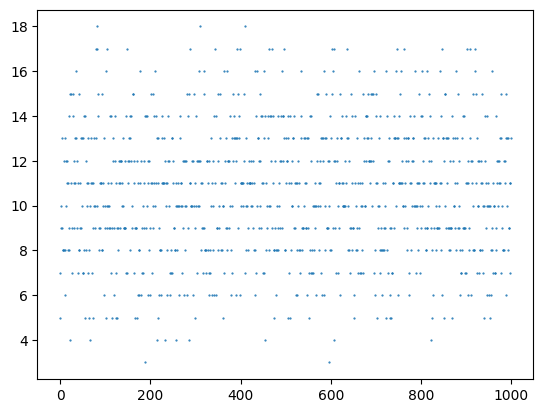

In [13]:
# Veamos qué aspecto tiene la distribución de index vs resultado
plt.scatter(df.index, df.resultado, s=0.3)

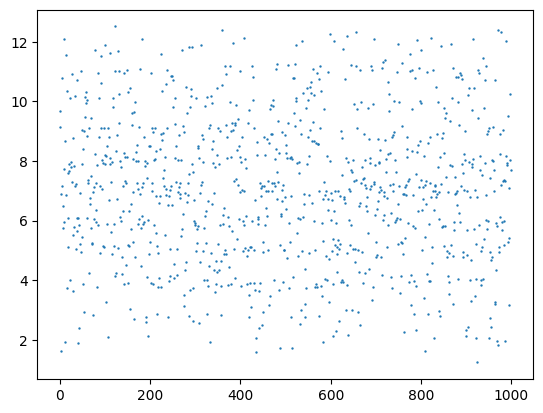

In [72]:
# Como la distribución de resultados es discreta, la superposición de puntos
# nos impide ver con claridad como es más probable sacar como resultado
# un número intermedio (8 ó 9) que uno de los extremos (3 ó 18)
# La forma de conseguir que un gráfico de dispersión de valores discretos
# muestre su densidad real es añadiéndole ruido gaussiano en el eje en el
# que se da superposición de valores

# Añadiendo ruido gaussiano
mu, sigma = 0, 0.25
noise1 = np.random.normal(mu, sigma, 1000)

plt.scatter(df.index, df.resultado + noise1, s=0.5)

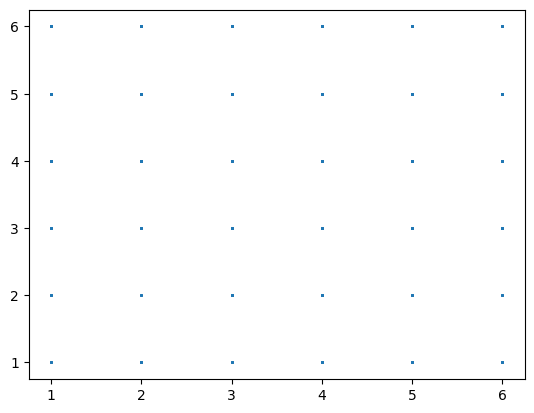

In [15]:
# Lo mismo ocurre al plotear dado1 contra dado2
# Veamos qué aspecto tiene la distribución de dado1 vs dado2

plt.scatter(df.dado1, df.dado2, s=0.3)

     dado1  dado2  dado3  resultado  dado1conRuido  dado2conRuido
0        1      1      3          5       0.960108       0.799027
1        3      1      3          7       2.929506       1.009440
2        2      4      4         10       2.079426       3.907578
3        4      2      3          9       4.146682       2.100540
4        5      3      1          9       5.068900       2.976303
..     ...    ...    ...        ...            ...            ...
995      4      3      2          9       3.869628       2.846063
996      1      5      5         11       0.920266       4.892692
997      3      2      2          7       2.905272       1.920874
998      4      1      6         11       4.032640       1.054136
999      2      6      5         13       2.124052       5.969751

[1000 rows x 6 columns]


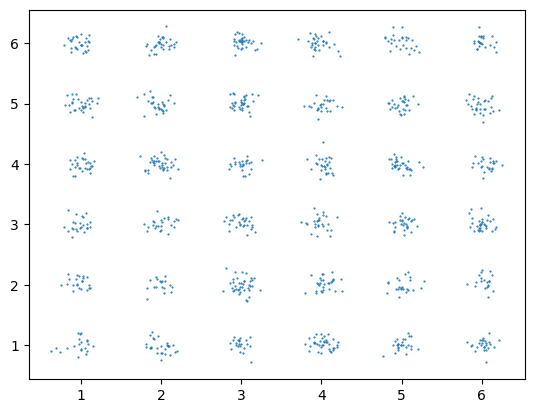

In [16]:
# No podemos estar seguros de que la dispersión es homogénea en todos los valores
# dado que se superponen. Para evitarlo, añadimos ruido en ambos ejes y entonces
# se muestra la verdadera densidad como homogénea

# Añadiendo ruido gaussiano
mu, sigma = 0, 0.1 
noise1 = np.random.normal(mu, sigma, 1000)
df["dado1conRuido"] = df.dado1 + noise1
noise2 = np.random.normal(mu, sigma, 1000)
df["dado2conRuido"] = df.dado2 + noise2

plt.scatter(df.dado1conRuido, df.dado2conRuido, s=0.3)
print(df)

## La distribución gaussiana y su desviación estándar sirven para establecer criterios de detección de outliers:

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

 - 1 Standard Deviation from the Mean: 68%

 - 2 Standard Deviations from the Mean: 95%

 - 3 Standard Deviations from the Mean: 99.7%

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

![Ubicación de los outliers en el histograma gaussiano](outliers-en-gaussian.jpg)

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

Given mu and sigma, a simple way to identify outliers is to compute a z-score for every xi, which is defined as the number of standard deviations away xi is from the mean. Data values that have a z-score sigma greater than a threshold, for example, of three, are declared to be outliers.

plt.hist(df["metrosCubiertos"],bins=250)

![](Argenprop-outliers.png)

# Ejercicio

1.- Crear una función que genere (devuelva) un número aleatorio con media = 0 y desviación estándard = 1

2.- Crear una función que determine (devuelva True or False) si ese número aleatorio generado está dentro del rango de 1 desviación estándar (entre -1 y +1)

3.- Crear un bucle de 1000 iteraciones que cuente cuántos números de los anteriores entran dentro del rango de 1 desviación estándar

4.- ¿El resultado es aproximádamente 683? ¿Por qué 683?

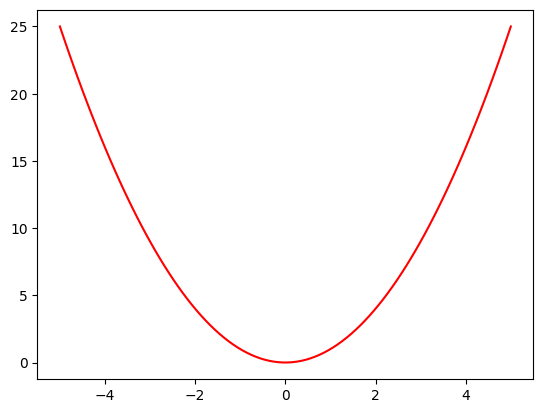

In [17]:
# Con numPy podemos dibujar cualquier función matemática
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x**2

# plot the function
plt.plot(x, y, 'r')

# show the plot
plt.show()

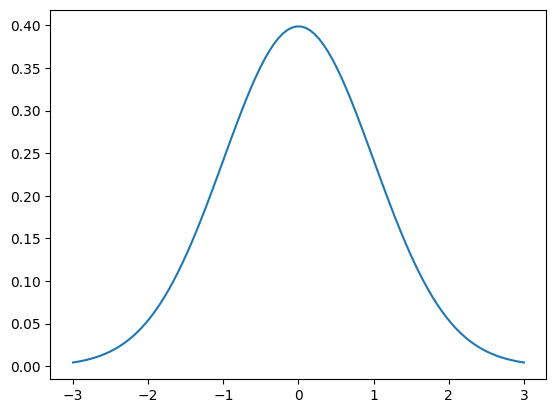

In [5]:
# Dibujamos la distribución de probablidad gaussiana
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma)) # Probability density function (PDF)
plt.show()

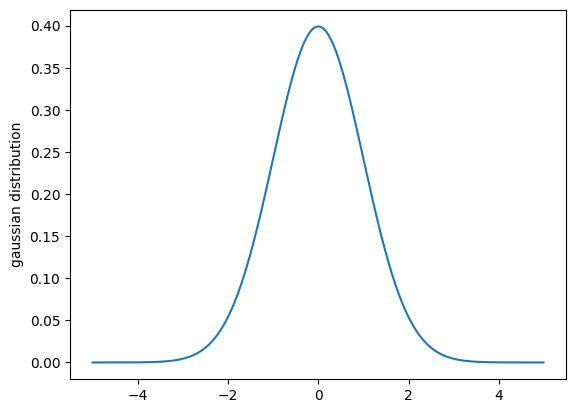

In [24]:
# O usando la fórmula matemática de la distribución
import numpy as np
import matplotlib.pyplot as plt

mean = 0; std = 1; variance = np.square(std)
x = np.arange(-5, 5, .01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x, f)
plt.ylabel('gaussian distribution')
plt.show()

/home/jips/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

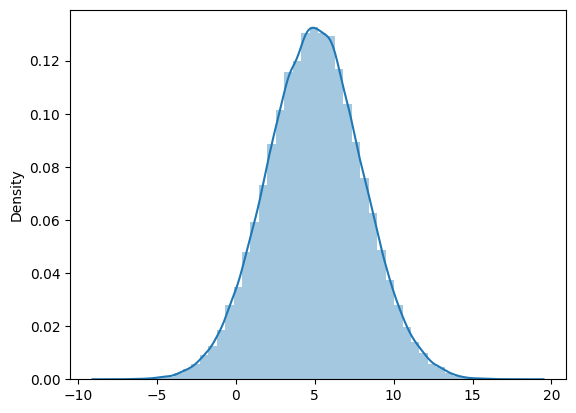

In [7]:
# También podemos dibujarla con seaborn usando valores aleatorios
import seaborn as sns

value = np.random.normal(loc=5, scale=3, size=1000)
sns.distplot(value)

# Conclusiones

1.- La distribución gaussiana o normal representa muchos eventos reales, como por ejemplo distribución de coeficientes de inteligencia, o errores en el disparo a una diana.

2.- La distribución gaussiana o normal puede emplearse para añadir ruido gaussiano a una o varias filas de datos, lo cuál resulta útil para dibujar dispersiones de datos discretos sin superposición.

3.- La distribución gaussiana o normal nos permite definir umbrales (thresholds) para eliminar del dataset los outliers.

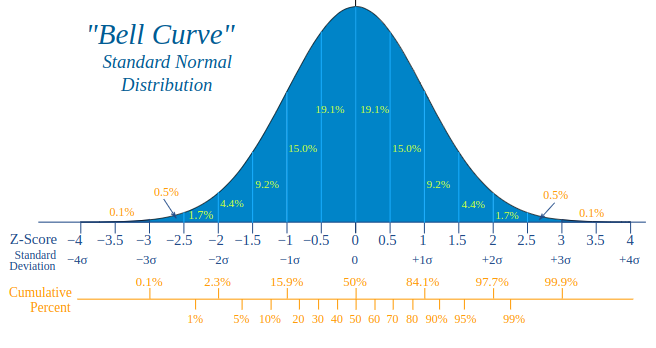
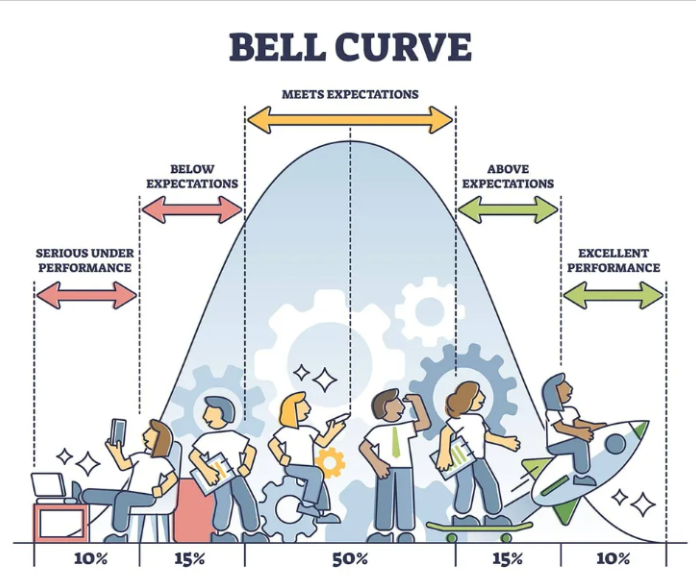
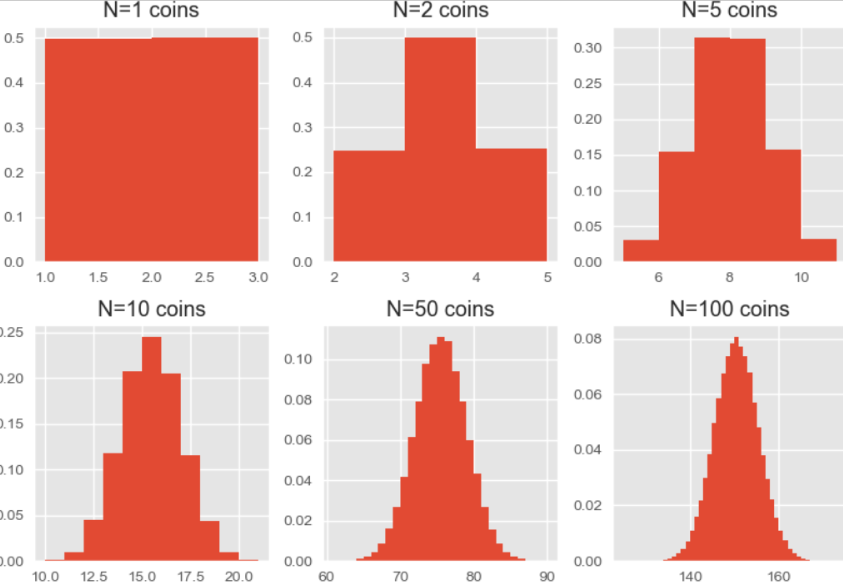
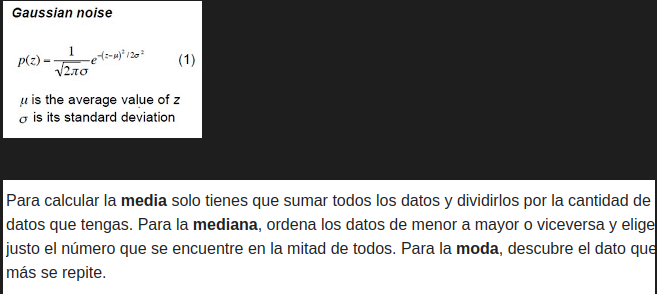
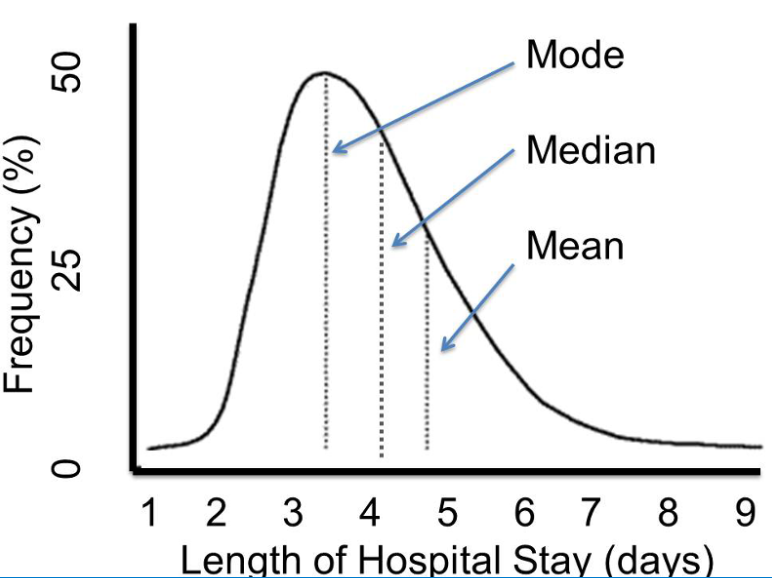
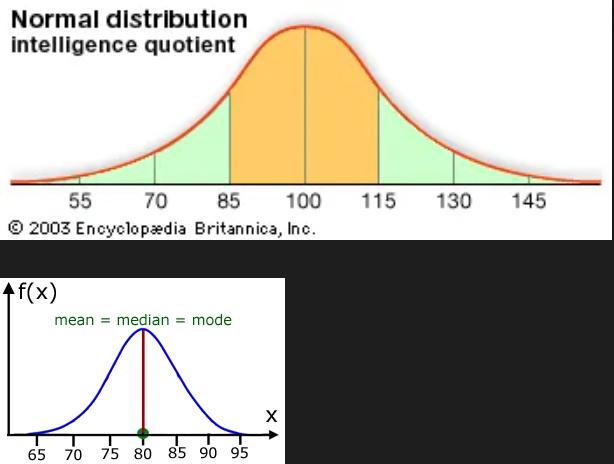
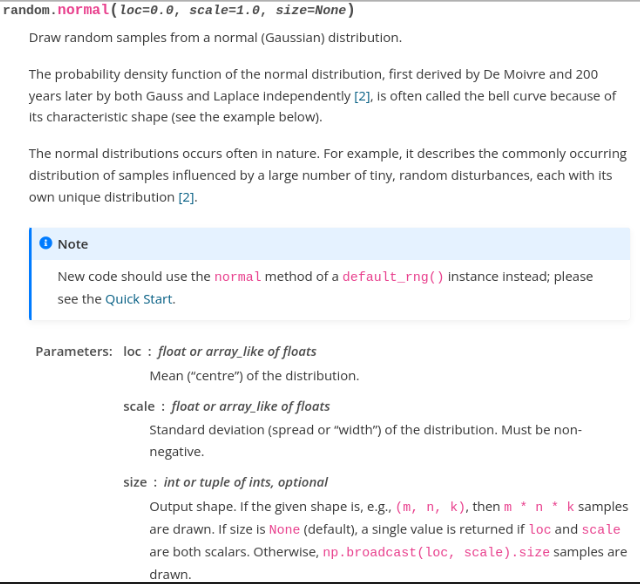
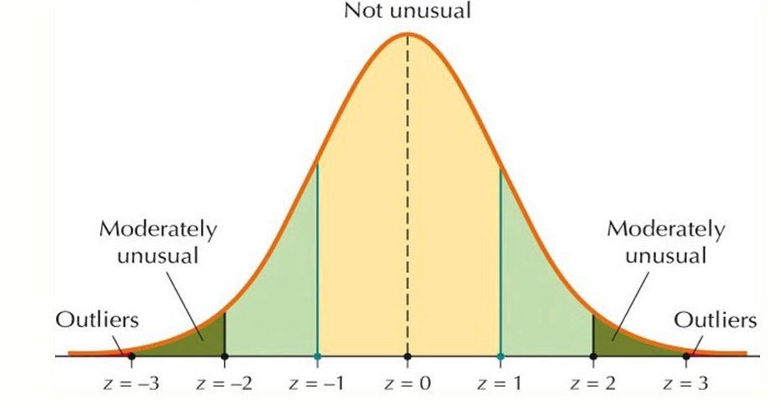
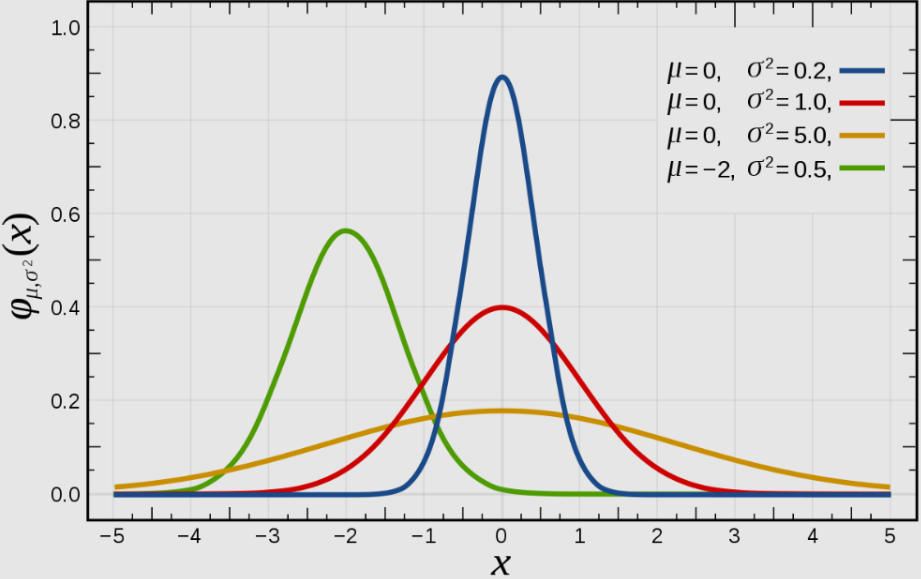
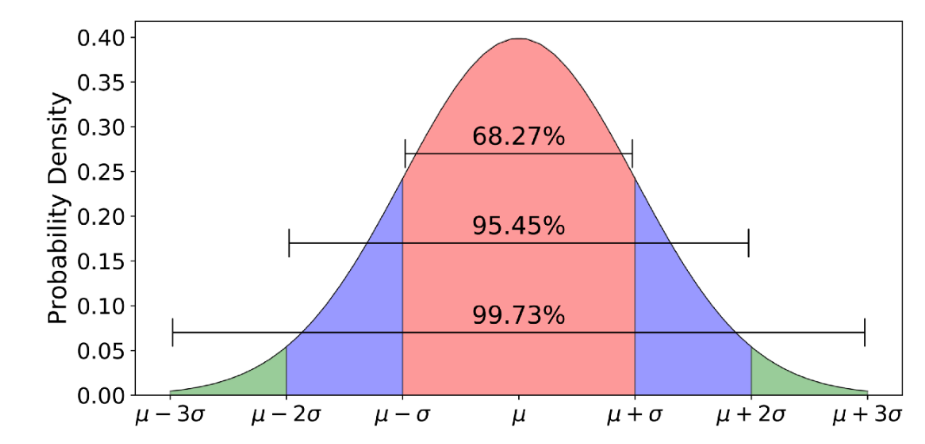
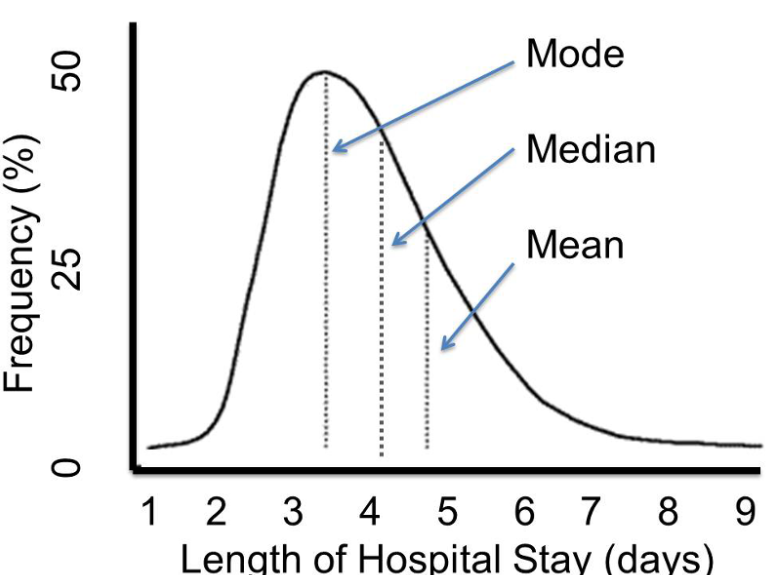
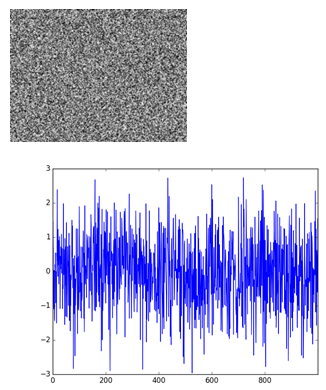
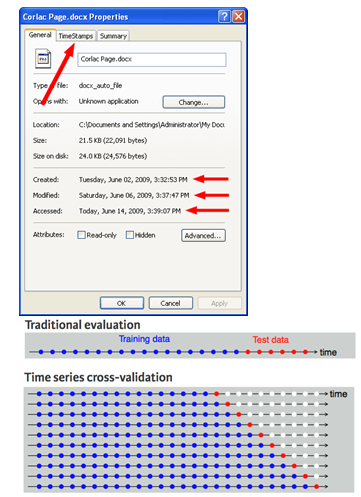
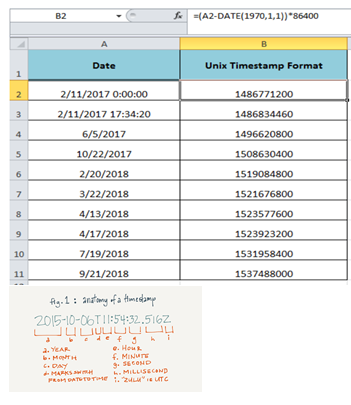
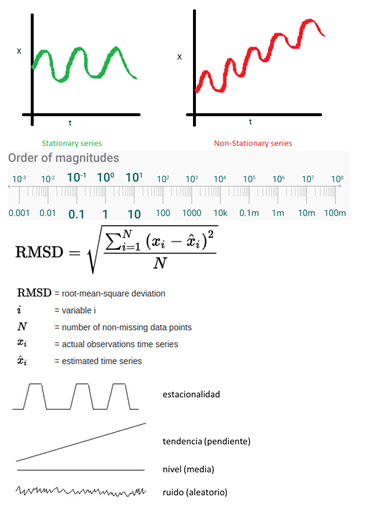